# Binary Classification using Logistic Regression

* Logistic Regression is used for **classification**, not regression.

* It predicts the **probability** of a class (e.g., 0 or 1).

* Uses the **sigmoid function** to squeeze output between **0 and 1**.

* Decision rule:

  * Probability ≥ 0.5 → class 1
  * Probability < 0.5 → class 0

* Works well when:

  * Classes are **linearly separable**,
  * You need a **fast**, simple model.

* Supports **regularization** (L1, L2) to avoid overfitting.

* For more than 2 classes, it uses **OvR** or **Softmax (Multinomial)**.


In [17]:

#for data wrangling
import pandas as pd

In [18]:
!pip install seaborn



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
!pip install scikit-learn



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:

import numpy as np

#far data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for classification algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score, classification_report

In [21]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [22]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


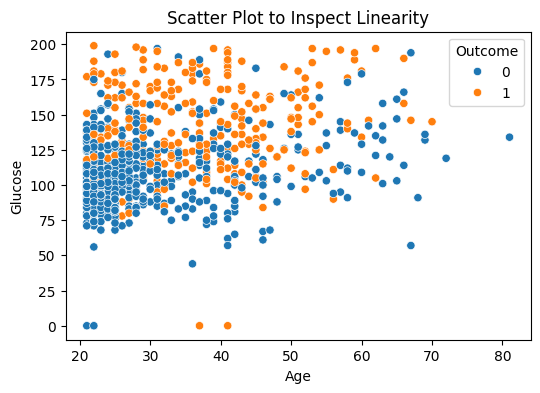

In [23]:

# ---- 1. VISUAL CHECK ----
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Age'],y=df['Glucose'],hue=df['Outcome'])
plt.title("Scatter Plot to Inspect Linearity")
plt.show()

In [24]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [25]:
df[["BloodPressure_log","Age_log","DiabetesPedigreeFunction_log","Pregnancies_log"]] = np.log1p(df[["BloodPressure","Age","DiabetesPedigreeFunction","Pregnancies"]])


In [26]:

# ================================
# 4. Split Data
# ================================
X = df[["Glucose", "BloodPressure_log", "Age_log", "Insulin","Pregnancies_log"]]
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 5)
(614,)
(154, 5)
(154,)


In [27]:
# ================================
# 5. Scaling
# ================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression

In [28]:

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

print("\n=== Logistic Regression (Normal) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


=== Logistic Regression (Normal) ===
Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        99
           1       0.70      0.58      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.75       154



AUC Score: 0.7928374655647382


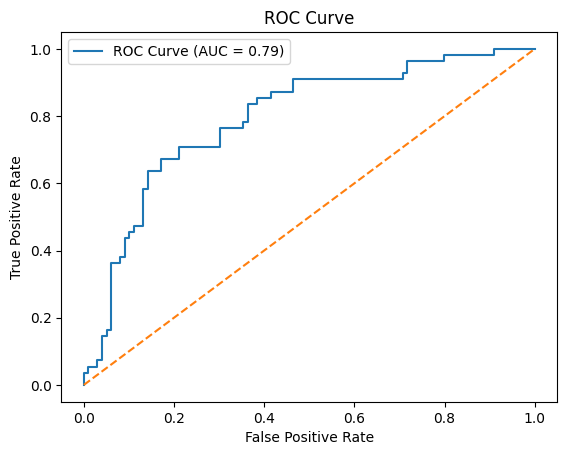

In [29]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for class 1
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Compute ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

print("AUC Score:", roc_auc)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Lasso Logistic Regrssion (L1)


Lasso Logistic Regrssion (L1)
L1 drives coefficients to exactly zero → feature selection

C controls strength:

Small C → stronger regularization → more coefficients become zero

Large C → weaker regularization

In [30]:

lasso = LogisticRegression(
    penalty="l1",
    solver="liblinear",   # or saga for multiclassification
    C=1.0
)
lasso.fit(X_train_scaled, y_train)
pred_lasso = lasso.predict(X_test_scaled)

print("\n=== Lasso Logistic Regression (L1) ===")
print("Accuracy:", accuracy_score(y_test, pred_lasso))
print(classification_report(y_test, pred_lasso))


=== Lasso Logistic Regression (L1) ===
Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        99
           1       0.70      0.58      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.75       154



c:\Users\ACM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\ACM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(



Ridge Logistic Regression(L2)

L2 shrinks coefficients but never makes them zero.

This means no feature selection, all features stay in the model.

Small C = strong regularization → coefficients shrink more.

Large C = weak regularization → coefficients shrink less.

Useful for reducing overfitting and handling multicollinearity.

In [31]:
ridge = LogisticRegression(
    penalty="l2",
    C=1.0
)
ridge.fit(X_train_scaled, y_train)
pred_ridge = ridge.predict(X_test_scaled)

print("\n=== Ridge Logistic Regression (L2) ===")
print("Accuracy:", accuracy_score(y_test, pred_ridge))
print(classification_report(y_test, pred_ridge))


=== Ridge Logistic Regression (L2) ===
Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        99
           1       0.70      0.58      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.75       154



c:\Users\ACM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(



Multiclass Classification With Logistic Regression


Logistic Regression can handle more than two classes using two strategies:

1. One-vs-Rest (OvR)

Default in scikit-learn. Creates one logistic regression model per class. Each model predicts: “Is this sample class k or not?”

2. Multinomial (Softmax Regression)

Uses softmax function to output probabilities for all classes at once. Usually gives better performance than OvR. Requires solvers like lbfgs, saga, or newton-cg. The model outputs class probabilities, and the class with the highest probability becomes the prediction.

Regularization still applies (L1/L2), and C controls the strength.

Common use cases: digit recognition, iris flowers classification, sentiment categories, etc.

In [32]:

import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [33]:
# Load dataset
iris = load_iris()
X = iris.data               # features
y = iris.target             # target (3 classes)

In [34]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    solver="lbfgs",          # REQUIRED for multinomial
    max_iter=500
)

model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [37]:
# Predictions
y_pred = model.predict(X_test)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



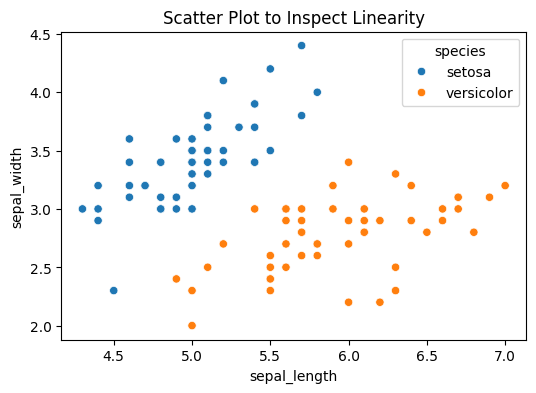

Logistic Regression Accuracy: 1.0
SVM (RBF) Accuracy: 1.0


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
data = sns.load_dataset("iris")

# We'll check if we can linearly separate Setosa vs Versicolor
df = data[data['species'] != 'virginica']  # keep only 2 classes

X = df[['sepal_length', 'sepal_width']]
y = df['species']

# ---- 1. VISUAL CHECK ----
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.title("Scatter Plot to Inspect Linearity")
plt.show()

# ---- 2. MODEL CHECK ----

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression (linear boundary)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))

# Nonlinear SVM (curved boundary)
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM (RBF) Accuracy:", accuracy_score(y_test, svm_pred))